In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from keras.models import Sequential
from keras.layers import Dense


In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


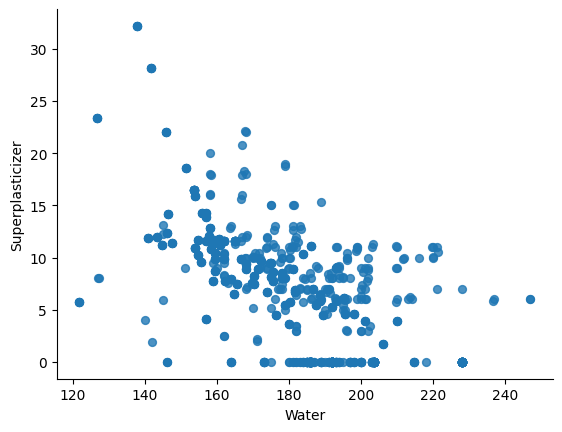

In [5]:









# @title Water vs Superplasticizer

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Water', y='Superplasticizer', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

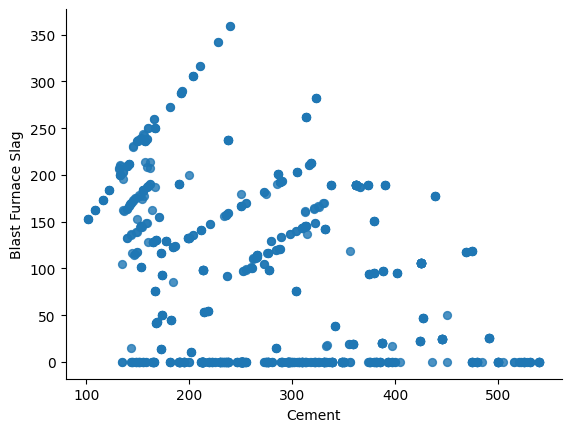

In [6]:


# @title Cement vs Blast Furnace Slag

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Cement', y='Blast Furnace Slag', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

###PART A

In [10]:

import sklearn
from sklearn.model_selection import train_test_split

In [11]:
df.shape


(1030, 9)

In [18]:
X = df[df.columns[df.columns != 'Strength']]
y =df['Strength']

y.head()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [19]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [30]:
#defining the architecture of the neural network
model = Sequential()
model.add(Dense(units = 8, input_shape=(8,),  activation='relu'))# this is the input layer
model.add(Dense(10, activation='relu')) # this is the hidden layer
model.add(Dense(1, activation ='linear'))

In [31]:
# to compile the model
model.compile (optimizer='adam',loss ='mean_squared_error', metrics=['mean_squared_error'])

In [32]:
# splitting the dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
#Training the model on the data
#model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 28291.7441 - mean_squared_error: 28291.7441
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 12396.3506 - mean_squared_error: 12396.3506
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 3715.7605 - mean_squared_error: 3715.7605
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 1333.0355 - mean_squared_error: 1333.0355
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 939.0685 - mean_squared_error: 939.0685
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 794.4730 - mean_squared_error: 794.4730
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 669.0639 - mean_squared_error: 669.0639
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 573.5813 - mean_squared_error: 573.5813
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 506.6566 - mean_squa

In [34]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [37]:
mse_list = []
for _ in range(50):
    # Train the model (steps 1-3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Compute MSE and append to mse_list
    model.fit(X_train, y_train, epochs = 50)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

Streaming output truncated to the last 5000 lines.
23/23 [==============================] - 0s 2ms/step - loss: 268.1367 - mean_squared_error: 268.1367
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 265.9350 - mean_squared_error: 265.9350
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 263.6642 - mean_squared_error: 263.6642
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 259.4467 - mean_squared_error: 259.4467
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 258.7361 - mean_squared_error: 258.7361
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 254.9580 - mean_squared_error: 254.9580
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 252.6548 - mean_squared_error: 252.6548
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 249.9077 - mean_squared_error: 249.9077
Epoch 9/50
23/23 [==============================] - 0s 2ms/step 

In [38]:
print(mse_list)

[269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444, 269.25958637790444]

###PART B

In [39]:
#defining the architecture of the neural network
model = Sequential()
model.add(Dense(units = 8, input_shape=(8,),  activation='relu'))# this is the input layer
model.add(Dense(10, activation='relu')) # this is the hidden layer
model.add(Dense(1, activation ='linear'))

In [40]:
# to compile the model
model.compile (optimizer='adam',loss ='mean_squared_error', metrics=['mean_squared_error'])

In [41]:
# splitting the dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [43]:
#Training the model on the data
#model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 23953.7227 - mean_squared_error: 23953.7227
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 2704.0835 - mean_squared_error: 2704.0835
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 1829.6683 - mean_squared_error: 1829.6683
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 1603.2897 - mean_squared_error: 1603.2897
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 1475.0032 - mean_squared_error: 1475.0032
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 1371.4108 - mean_squared_error: 1371.4108
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 1252.4855 - mean_squared_error: 1252.4855
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 1147.6261 - mean_squared_error: 1147.6261
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 1056.2247 - me

In [44]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [45]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [46]:
mse_list = []
for _ in range(50):
    # Train the model (steps 1-3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Compute MSE and append to mse_list
    model.fit(X_train, y_train, epochs = 50)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

Streaming output truncated to the last 5000 lines.
23/23 [==============================] - 0s 4ms/step - loss: 198.7058 - mean_squared_error: 198.7058
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 197.3287 - mean_squared_error: 197.3287
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 193.9083 - mean_squared_error: 193.9083
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 192.1350 - mean_squared_error: 192.1350
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 187.6922 - mean_squared_error: 187.6922
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 186.2417 - mean_squared_error: 186.2417
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 182.5392 - mean_squared_error: 182.5392
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 181.3690 - mean_squared_error: 181.3690
Epoch 9/50
23/23 [==============================] - 0s 4ms/step 

In [47]:
print(mse_list)

[214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639, 214.4009019830639]


### PART C

In [49]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
23/23 [==============================] - 0s 4ms/step - loss: 47.1085 - mean_squared_error: 47.1085
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 45.8209 - mean_squared_error: 45.8209
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 45.7334 - mean_squared_error: 45.7334
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 45.7869 - mean_squared_error: 45.7869
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 47.7233 - mean_squared_error: 47.7233
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 48.2968 - mean_squared_error: 48.2968
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 46.1811 - mean_squared_error: 46.1811
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 47.1386 - mean_squared_error: 47.1386
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 46.8314 - mean_squared_error: 46.8314
E

In [50]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [53]:
mse_list = []
for _ in range(50):
    # Train the model (steps 1-3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Compute MSE and append to mse_list
    model.fit(X_train, y_train, epochs = 100)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

Streaming output truncated to the last 5000 lines.
23/23 [==============================] - 0s 4ms/step - loss: 33.8945 - mean_squared_error: 33.8945
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 34.1156 - mean_squared_error: 34.1156
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 34.4122 - mean_squared_error: 34.4122
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 33.5386 - mean_squared_error: 33.5386
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 33.4857 - mean_squared_error: 33.4857
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 33.8011 - mean_squared_error: 33.8011
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 32.8711 - mean_squared_error: 32.8711
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 34.7348 - mean_squared_error: 34.7348
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 

### PART D

In [54]:
#defining the architecture of the neural network
model = Sequential()
model.add(Dense(units = 8, input_shape=(8,),  activation='relu'))# this is the input layer
model.add(Dense(10, activation='relu')) # this is the hidden layer
model.add(Dense(10, activation='relu')) # this is the hidden layer
model.add(Dense(10, activation='relu')) # this is the hidden layer
model.add(Dense(1, activation ='linear'))

In [55]:
# to compile the model
model.compile (optimizer='adam',loss ='mean_squared_error', metrics=['mean_squared_error'])

In [56]:
# splitting the dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [58]:
#Training the model on the data
#model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 4668.8501 - mean_squared_error: 4668.8501
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 929.8892 - mean_squared_error: 929.8892
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 343.1295 - mean_squared_error: 343.1295
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 264.2385 - mean_squared_error: 264.2385
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 261.7076 - mean_squared_error: 261.7076
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 258.0009 - mean_squared_error: 258.0009
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 252.5312 - mean_squared_error: 252.5312
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 246.6232 - mean_squared_error: 246.6232
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 241.9759 - mean_squared_error:

In [59]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [61]:
mse_list = []
for _ in range(50):
    # Train the model (steps 1-3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Compute MSE and append to mse_list
    model.fit(X_train, y_train, epochs = 50)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

Streaming output truncated to the last 5000 lines.
23/23 [==============================] - 0s 2ms/step - loss: 125.6147 - mean_squared_error: 125.6147
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 121.3568 - mean_squared_error: 121.3568
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 119.1728 - mean_squared_error: 119.1728
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 118.3124 - mean_squared_error: 118.3124
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 114.5087 - mean_squared_error: 114.5087
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 114.6435 - mean_squared_error: 114.6435
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 112.5439 - mean_squared_error: 112.5439
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 115.0815 - mean_squared_error: 115.0815
Epoch 9/50
23/23 [==============================] - 0s 2ms/step 

In [62]:
print(mse_list)

[130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767, 130.1610231581767]
